# Assignment 7 - Numpy and Matplotlib
### Due Monday July 27

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository `CMSC6950_Assignments` in a new folder named `assignment_7`. 

## 1 Plotting and analyzing ARGO float data

#### 1.1 Import numpy


In [8]:
import numpy as np


#### 1.2 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

In [9]:
!wget http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/dant/.wget-hsts'. HSTS will be disabled.
--2020-07-28 12:45:02--  http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz [following]
--2020-07-28 12:45:03--  https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144032 (141K)
Saving to: ‘argo_float_4901412.npz.3’

argo_float_4901412. 100%[===================>] 140.66K   524KB/s    in 0.3s    

2020-07-28 12:45:04 (524 KB/s) - ‘argo_float_4901412.npz.3’ saved [144032/144032]



#### 1.3 Load the data file

In [10]:
data = np.load('argo_float_4901412.npz')
list(data)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']

#### 1.4 Extract the temperature, pressure and salinity arrays to arrays T, S, P and mask out invalid data (the nan values from missing points).

In [11]:
T= np.ma.masked_invalid(data['T'])
S= np.ma.masked_invalid(data['S'])
P= np.ma.masked_invalid(data['P'])

#### 1.5 Extract the date, lat, lon, and levels arrays. 

In [12]:
lat= (data['lat'])
lon= (data['lon'])
levels= (data['levels'])
date= (data['date'])

#### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [14]:
T.shape, S.shape, P.shape,levels.shape
#tells us how many values we have in each array, as we used the masked the Temperature salinity and Pressure lost info and had a TRUE false Value.

((78, 75), (78, 75), (78, 75), (78,))

#### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [15]:
from matplotlib import pyplot as plt

#### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

No handles with labels found to put in legend.


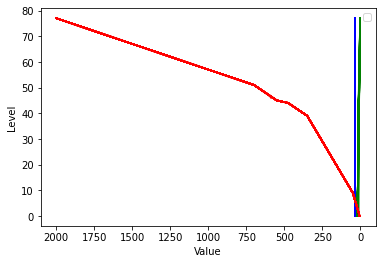

In [18]:
plt.plot(T, levels, color="green")
plt.gca().invert_xaxis()
plt.plot(S, levels, color="blue")
plt.gca().invert_xaxis()
plt.plot(P, levels, color="red")
plt.gca().invert_xaxis()
plt.xlabel('Value')
plt.ylabel('Level')
plt.legend()
plt.show()

(<matplotlib.colorbar.Colorbar at 0x7f0737dcfe80>,)

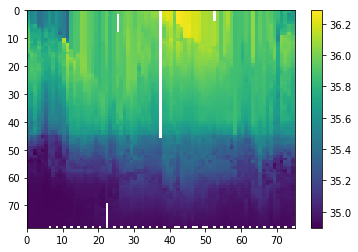

In [14]:
plt.pcolormesh(S)
plt.gca().invert_yaxis()
plt.colorbar(),

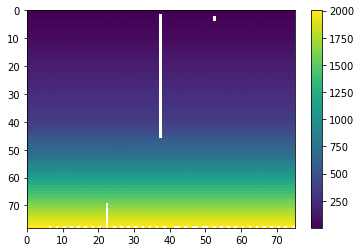

In [15]:
plt.pcolormesh(P)
plt.gca().invert_yaxis()
plt.colorbar()

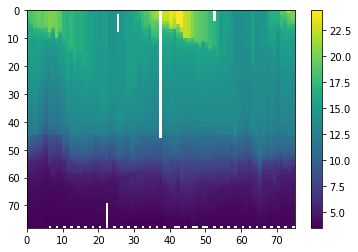

In [16]:
plt.pcolormesh(T)
plt.gca().invert_yaxis()
plt.colorbar()

# Code from Classmate

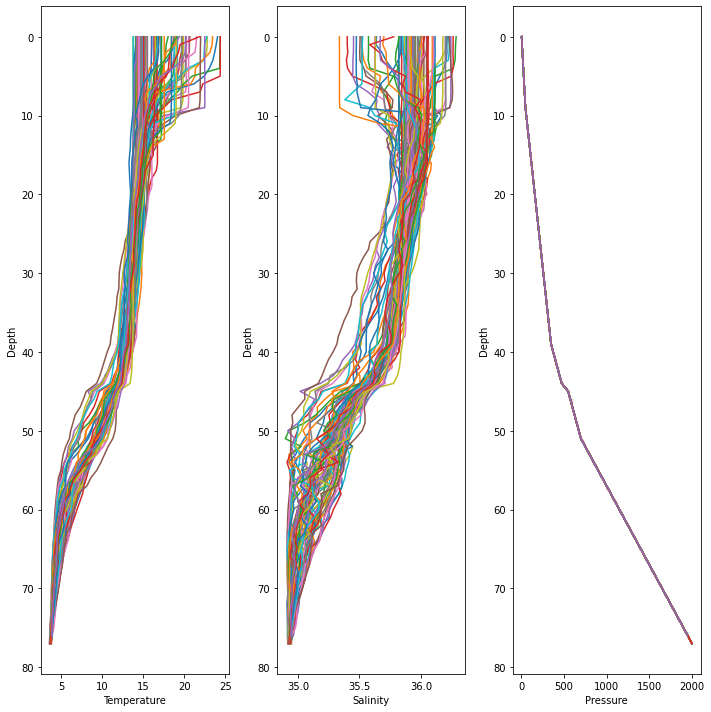

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots (1,3, figsize= (10,10))

ax1.plot(T, levels)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Depth")
ax1.invert_yaxis()

ax2.plot(S, levels)
ax2.set_xlabel("Salinity")
ax2.set_ylabel("Depth")
ax2.invert_yaxis()

ax3.plot(P, levels)
ax3.set_xlabel("Pressure")
ax3.set_ylabel("Depth")
ax3.invert_yaxis()

plt.tight_layout()

#### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `levels`.

In [19]:
Tm= T.mean()
Sm= S.mean()
Pm= P.mean()
Ts=np.std(T)
Ss=np.std(S)
Ps=np.std(P)
Tm,Sm,Pm,Ts,Ss,Ps

(11.104955983298781,
 35.53375800851532,
 617.7636946613931,
 4.660526903885564,
 0.39617465005493235,
 586.4118096127003)

#### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

[Text(0, 0, 'Temperature'), Text(0, 0, 'Salinity'), Text(0, 0, 'Pressure')]

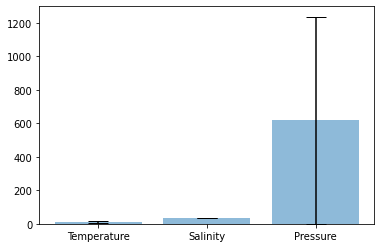

In [21]:
labels = ['Temperature', 'Salinity', 'Pressure']
x_pos = np.arange(len(labels))
CTEs = [Tm, Sm, Pm]
error = [Ts, Ss, Pm]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

# Code From Class

In [19]:
#fig, (ax1, ax2, ax3) = plt.subplots (1,3, figsize= (10,10))

ax1.pyplot.errorbar(T, levels)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Depth")
ax1.invert_yaxis()

ax2.errorbar(S, levels)
ax2.set_xlabel("Salinity")
ax2.set_ylabel("Depth")
ax2.invert_yaxis()

ax3.errorbar(P, levels)
ax3.set_xlabel("Pressure")
ax3.set_ylabel("Depth")
ax3.invert_yaxis()

plt.tight_layout()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

#### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

# Classmate code

In [20]:
Tm_date= []
Sm_date= []
Pm_date= []
Tstd_date= []
Sstd_date= []
Pstd_date= []
T_tr= np.transpose(Tm)
S_tr= np.transpose(Sm)
P_tr= np.transpose(Pm)
for num , row in enumerate([t_tr,p_tr,S_tr],0):
    for cols,dt in enumerate(date,0):
        if num ==0:
            Tm_date.append(np.mean(row[cols]))
            Tstd_date.append(np.std(row[cols]))
        elif num ==1:
            Sm_date.append(np.mean(row[cols]))
            Sstd_date.append(np.std(row[cols]))
        else:
            Pm_date.append(np.mean(row[cols]))
            Pstd_date.append(np.std(row[cols]))

NameError: name 'Tm' is not defined

#### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

#### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

## 2 Matrix  multiplication
#### 2.1 Create a function called myMatrixMultiply that takes input matrices X and Y and computes their matrix product. 

*Matrix Multiplication.* In this exercise you will create two square matrices $A$ and $B$ with dimensions $n \times n$. You will then use [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) to compute their product with the results being stored in matrix $C$. Thus, you will be computing the matrix equation $C = AB$. Note that matrix multiplication is different from element by element array multiplication. See the [wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication) if you are unsure what matrix multiplication is.

Use three nested `for` loops to *explicitly* perform the matrix multiplication. The inner most loop calculates element `C[i,j]` which is equal to the sum of `A[i,k]*B[k,j]` over all values of index `k` from `0` to `n-1`. The two outer loops iterate over `i` and `j`.

In [45]:
n=10
p=5
m=10
A=np.full((n,p),np.pi)
B=np.full((p,m),5)
C=np.zeros((n,m))
for i in range(n):
    for j in range(m):
        for k in range(p):
            C[i,j] = C[i,j]+A[i,k]*B[k,j]         

In [48]:
C

array([[78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634,
        78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634],
       [78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634,
        78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634],
       [78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634,
        78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634],
       [78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634,
        78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634],
       [78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634,
        78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634],
       [78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634,
        78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634],
       [78.53981634, 78.53981634, 78.53981634, 78.53981634, 78.53981634,
        78.53981634, 78.53981634, 78.53981634

#### 2.2 Create ones() square matrices for A and B with n = 100. Use the `%timeit` function to compute the matrix product AB using your function `myMatrixMultiply`.

In [58]:
n=100
p=100
m=100
A=np.full((n,p),np.pi)
B=np.full((p,m),5)
C=np.zeros((n,m))
for i in range(n):
    for j in range(m):
        for k in range(p):
            C[i,j] = C[i,j]+A[i,k]*B[k,j]
%timeit C
C

29.4 ns ± 2.34 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


array([[1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       ...,
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679]])

#### 2.3 Now let's see how much faster Numpy's built in matrix multiplication routine is. 
In Numpy, matrix multiplication is done using the `dot()` function. Use the `%timeit` function to compute the matrix product AB for n = 100 using `dot()` and time it using the `%timeit` function.

How much faster is using NumPy's `dot()` compared your `myMatrixMultiply` function? 

In [61]:
n=100
p=100
m=100
A=np.full((n,p),np.pi)
B=np.full((p,m),5)
%timeit np.dot(A,B)
np.dot(A,B)

201 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array([[1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       ...,
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679],
       [1570.79632679, 1570.79632679, 1570.79632679, ..., 1570.79632679,
        1570.79632679, 1570.79632679]])

Now time how long it takes for n = 1000

In [62]:
n=1000
p=1000
m=1000
A=np.full((n,p),np.pi)
B=np.full((p,m),5)
%timeit np.dot(A,B)
np.dot(A,B)

98.3 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


array([[15707.96326795, 15707.96326795, 15707.96326795, ...,
        15707.96326795, 15707.96326795, 15707.96326795],
       [15707.96326795, 15707.96326795, 15707.96326795, ...,
        15707.96326795, 15707.96326795, 15707.96326795],
       [15707.96326795, 15707.96326795, 15707.96326795, ...,
        15707.96326795, 15707.96326795, 15707.96326795],
       ...,
       [15707.96326795, 15707.96326795, 15707.96326795, ...,
        15707.96326795, 15707.96326795, 15707.96326795],
       [15707.96326795, 15707.96326795, 15707.96326795, ...,
        15707.96326795, 15707.96326795, 15707.96326795],
       [15707.96326795, 15707.96326795, 15707.96326795, ...,
        15707.96326795, 15707.96326795, 15707.96326795]])